In [1]:
import pandas as pd
import numpy as np

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_021037e57f314a96ba456b41ff50196c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='trKTOQgLCuC2zyHj69iqvTayv3qRcaHPnmv3KfPhD9Lr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_021037e57f314a96ba456b41ff50196c.get_object(Bucket='datascienceprojects-donotdelete-pr-h3n6mcwhewbbma',Key='dataset_countries.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data_c = pd.read_excel(body)
data_c.head()


,country,alcohol-cons,lifeexpectancy,incomeperperson
0,Afghanistan,0.03,48.673,4264.980000
1,Albania,7.29,76.918,1914.996551
2,Algeria,0.69,73.131,2231.993335
3,Angola,5.57,51.093,1381.004268
4,Argentina,9.35,75.901,10749.419238


In [3]:
data_c.shape

(176, 4)

In [4]:
c1= data_c['alcohol-cons'].value_counts(sort= False)
p1= data_c['alcohol-cons'].value_counts(sort= False, normalize= True)
print('Counts for alcohol consumption: ')
print(c1)
print("Percentage for alcohol consumption ")
print(p1)

Counts for alcohol consumption: 
15.00    1
5.25     1
3.99     1
9.75     1
0.50     1
9.50     1
1.05     1
5.00     1
4.99     1
4.43     1
11.01    1
5.12     1
7.79     1
1.87     1
5.92     2
0.92     1
3.02     1
6.99     1
12.05    1
12.02    1
12.48    1
0.28     1
9.43     1
13.31    1
7.08     1
0.34     2
9.72     1
4.39     1
6.56     1
4.98     1
        ..
10.41    1
0.56     1
5.05     1
1.32     1
6.42     1
3.88     1
1.92     1
0.05     1
0.65     1
10.71    1
12.84    1
1.29     1
3.39     2
10.08    1
2.27     1
9.46     1
4.46     1
1.03     1
11.41    1
6.66     1
3.11     1
7.32     1
2.76     1
1.64     1
13.89    1
16.30    1
0.96     1
0.32     1
9.48     1
14.94    1
Name: alcohol-cons, Length: 169, dtype: int64
Percentage for alcohol consumption 
15.00    0.005682
5.25     0.005682
3.99     0.005682
9.75     0.005682
0.50     0.005682
9.50     0.005682
1.05     0.005682
5.00     0.005682
4.99     0.005682
4.43     0.005682
11.01    0.005682
5.12     0.00568

In [5]:
c2= data_c['lifeexpectancy'].value_counts(sort= False)
p2= data_c['lifeexpectancy'].value_counts(sort= False, normalize= True)
print('Counts for life expectancy: ')
print(c2)
print("Percentage for life expectancy: ")
print(p2)

Counts for life expectancy: 
63.125    1
51.384    1
68.795    1
67.529    1
74.414    1
79.977    1
58.199    1
75.670    1
81.012    1
79.591    1
72.283    1
55.442    1
81.855    1
48.398    1
68.944    1
79.915    1
76.126    1
69.317    1
57.134    1
75.057    1
77.685    1
68.498    1
68.287    1
79.634    1
74.221    1
61.597    1
51.444    1
62.465    1
73.737    1
73.488    1
         ..
73.911    1
73.703    1
67.714    1
48.718    1
71.172    1
73.456    1
48.397    1
77.005    1
73.371    1
55.377    1
74.788    1
74.402    1
47.794    1
68.749    1
81.539    1
54.210    1
71.017    1
81.404    1
73.373    1
73.127    1
69.245    1
74.044    1
62.791    1
76.918    1
57.937    1
73.126    1
64.666    1
75.956    1
57.379    1
68.978    1
Name: lifeexpectancy, Length: 174, dtype: int64
Percentage for life expectancy: 
63.125    0.005682
51.384    0.005682
68.795    0.005682
67.529    0.005682
74.414    0.005682
79.977    0.005682
58.199    0.005682
75.670    0.005682
81.012

In [6]:
data_c.dtypes

country             object
alcohol-cons       float64
lifeexpectancy     float64
incomeperperson    float64
dtype: object

In [7]:
data_c['alcohol-cons']= pd.to_numeric(data_c['alcohol-cons'], errors='coerce')

In [8]:
data_c['lifeexpectancy']= pd.to_numeric(data_c['lifeexpectancy'], errors='coerce')

In [9]:
data_c.dtypes

country             object
alcohol-cons       float64
lifeexpectancy     float64
incomeperperson    float64
dtype: object

In [10]:
bins=np.linspace(min(data_c['alcohol-cons']),max(data_c['alcohol-cons']),4)
group_names=["low","medium","high"]
data_c["binned"]=pd.cut(data_c['alcohol-cons'],bins,labels=group_names,include_lowest=True)

In [11]:
data_c.head()

,country,alcohol-cons,lifeexpectancy,incomeperperson,binned
0,Afghanistan,0.03,48.673,4264.980000,low
1,Albania,7.29,76.918,1914.996551,low
2,Algeria,0.69,73.131,2231.993335,low
3,Angola,5.57,51.093,1381.004268,low
4,Argentina,9.35,75.901,10749.419238,medium


In [12]:
data_c.dropna(subset=['alcohol-cons'], axis=0, inplace=True)

In [13]:
data_c.shape

(176, 5)

In [14]:
bins=np.linspace(min(data_c['lifeexpectancy']),max(data_c['lifeexpectancy']),4)
group_names=["low","medium","high"]
data_c["binned-LE"]=pd.cut(data_c['lifeexpectancy'],bins,labels=group_names,include_lowest=True)

In [15]:
data_c.head()

,country,alcohol-cons,lifeexpectancy,incomeperperson,binned,binned-LE
0,Afghanistan,0.03,48.673,4264.980000,low,low
1,Albania,7.29,76.918,1914.996551,low,high
2,Algeria,0.69,73.131,2231.993335,low,high
3,Angola,5.57,51.093,1381.004268,low,low
4,Argentina,9.35,75.901,10749.419238,medium,high


In [16]:
import seaborn
import matplotlib.pyplot as plt

Text(0, 0.5, 'count')

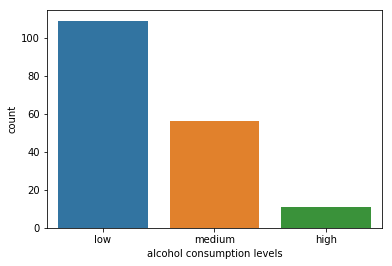

In [17]:
seaborn.countplot(x='binned',data=data_c)
plt.xlabel('alcohol consumption levels')
plt.ylabel('count')

Text(0, 0.5, 'count')

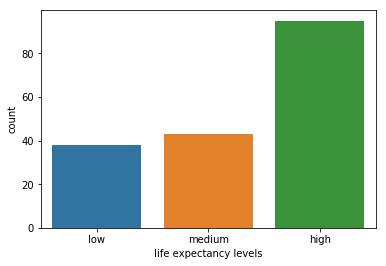

In [18]:
seaborn.countplot(x='binned-LE',data=data_c)
plt.xlabel('life expectancy levels')
plt.ylabel('count')

Text(0, 0.5, 'count')

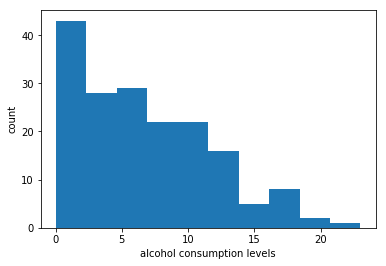

In [19]:
plt.hist(x='alcohol-cons',data=data_c)
plt.xlabel('alcohol consumption levels')
plt.ylabel('count')

Text(0, 0.5, 'count')

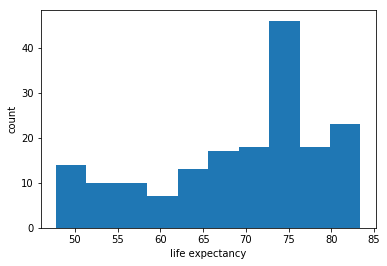

In [20]:
plt.hist(x='lifeexpectancy',data=data_c)
plt.xlabel('life expectancy')
plt.ylabel('count')

In [21]:
data_c.describe()

,alcohol-cons,lifeexpectancy,incomeperperson
count,176.000000,176.000000,176.000000
mean,6.646250,69.143682,6988.487614
std,4.977415,9.828267,10228.712108
min,0.030000,47.794000,103.775857
25%,2.495000,62.646000,702.366463
50%,5.865000,72.558500,2231.334855
75%,9.810000,75.985000,7507.351572
max,23.010000,83.394000,52301.587179


/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(10.049999999999997, 0.5, 'life expectancy')

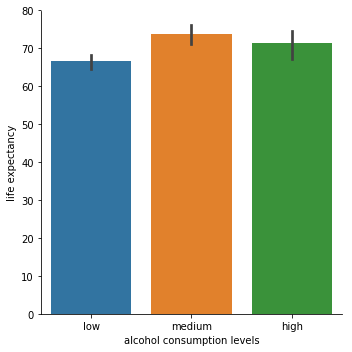

In [22]:
seaborn.factorplot(x='binned',y='lifeexpectancy',data=data_c,kind='bar')
plt.xlabel('alcohol consumption levels')
plt.ylabel('life expectancy')

Text(0, 0.5, 'life expectancy')

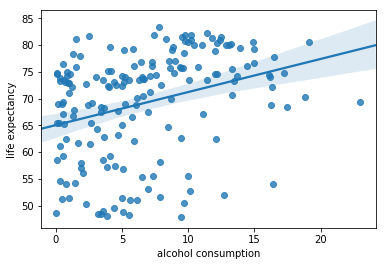

In [23]:
scat=seaborn.regplot(x='alcohol-cons',y='lifeexpectancy',data=data_c)
plt.xlabel('alcohol consumption')
plt.ylabel('life expectancy')

ANOVA

In [24]:
import statsmodels.formula.api as snf

In [25]:
model1=snf.ols(formula='lifeexpectancy ~ binned', data=data_c)
result1=model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     11.59
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           1.90e-05
Time:                        13:57:46   Log-Likelihood:                -640.38
No. Observations:                 176   AIC:                             1287.
Df Residuals:                     173   BIC:                             1296.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           66.5390      0.889  

In [26]:
m= data_c.groupby('binned').mean()
print(m)

        alcohol-cons  lifeexpectancy  incomeperperson
binned                                               
low         3.378349       66.538972      3860.781422
medium     10.859107       73.779732     13533.612919
high       17.580909       71.352273      4660.574680


In [27]:
sd= data_c.groupby('binned').std()
print(sd)

        alcohol-cons  lifeexpectancy  incomeperperson
binned                                               
low         2.333598        9.415789      6713.081785
medium      2.046360        9.400233     13287.336005
high        2.096480        6.872505      4552.701608


POST HOC TEST

In [28]:
import statsmodels.stats.multicomp as multi

In [29]:
mc1=multi.MultiComparison(data_c['lifeexpectancy'], data_c['binned'])
res1=mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower    upper  reject
----------------------------------------------
 high   low   -4.8133  -11.7563  2.1297 False 
 high  medium  2.4275  -4.8105   9.6654 False 
 low   medium  7.2408   3.6325  10.8491  True 
----------------------------------------------


CHI-SQUARE TEST

In [30]:
import scipy.stats

In [31]:
#contigency table of observed counts
ct1=pd.crosstab(data_c['binned-LE'],data_c['binned'])
print(ct1)

binned     low  medium  high
binned-LE                   
low         30       7     1
medium      33       6     4
high        46      43     6


In [32]:
#column percentage
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

binned          low    medium      high
binned-LE                              
low        0.275229  0.125000  0.090909
medium     0.302752  0.107143  0.363636
high       0.422018  0.767857  0.545455


In [33]:
#chi-square
print('chi-sqaure, p-value, expected counts')
cs1=scipy.stats.chi2_contingency(ct1)
print(cs1)

chi-sqaure, p-value, expected counts
(19.3914092891713, 0.0006582916953941825, 4, array([[23.53409091, 12.09090909,  2.375     ],
       [26.63068182, 13.68181818,  2.6875    ],
       [58.83522727, 30.22727273,  5.9375    ]]))


Post hoc test

In [34]:
data_c['binned']=data_c['binned'].astype('category')

In [35]:
recode2={'low': 'low', 'medium': 'medium'}
data_c['comp1v2']=data_c['binned'].map(recode2)

In [36]:
ct2=pd.crosstab(data_c['binned-LE'],data_c['comp1v2'])
print(ct2)

comp1v2    low  medium
binned-LE             
low         30       7
medium      33       6
high        46      43


In [37]:
#column percentage
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

comp1v2         low    medium
binned-LE                    
low        0.275229  0.125000
medium     0.302752  0.107143
high       0.422018  0.767857


In [38]:
print('chi-sqaure, p-value, expected counts')
cs2=scipy.stats.chi2_contingency(ct2)
print(cs2)

chi-sqaure, p-value, expected counts
(17.914895385388117, 0.0001287745067693305, 2, array([[24.44242424, 12.55757576],
       [25.76363636, 13.23636364],
       [58.79393939, 30.20606061]]))


In [39]:
recode3={'low': 'low', 'high': 'high'}
data_c['comp1v3']=data_c['binned'].map(recode3)

In [40]:
ct3=pd.crosstab(data_c['binned-LE'],data_c['comp1v3'])
print(ct3)
#column percentage
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
print(colpct)
print('chi-sqaure, p-value, expected counts')
cs3=scipy.stats.chi2_contingency(ct3)
print(cs3)

comp1v3    high  low
binned-LE           
low           1   30
medium        4   33
high          6   46
comp1v3        high       low
binned-LE                    
low        0.090909  0.275229
medium     0.363636  0.302752
high       0.545455  0.422018
chi-sqaure, p-value, expected counts
(1.78546615954133, 0.40953493016824283, 2, array([[ 2.84166667, 28.15833333],
       [ 3.39166667, 33.60833333],
       [ 4.76666667, 47.23333333]]))


In [41]:
recode4={'medium': 'medium', 'high': 'high'}
data_c['comp1v4']=data_c['binned'].map(recode4)

In [42]:
ct4=pd.crosstab(data_c['binned-LE'],data_c['comp1v4'])
print(ct4)
#column percentage
colsum=ct4.sum(axis=0)
colpct=ct4/colsum
print(colpct)
print('chi-sqaure, p-value, expected counts')
cs4=scipy.stats.chi2_contingency(ct4)
print(cs4)

comp1v4    high  medium
binned-LE              
low           1       7
medium        4       6
high          6      43
comp1v4        high    medium
binned-LE                    
low        0.090909  0.125000
medium     0.363636  0.107143
high       0.545455  0.767857
chi-sqaure, p-value, expected counts
(4.763905545984628, 0.09237002358994359, 2, array([[ 1.31343284,  6.68656716],
       [ 1.64179104,  8.35820896],
       [ 8.04477612, 40.95522388]]))


Pearson Correlation

In [43]:
print('association between alcohol consumption and life expectancy')
print(scipy.stats.pearsonr(data_c['alcohol-cons'],data_c['lifeexpectancy']))

association between alcohol consumption and life expectancy
(0.31299387454702204, 2.34202877801358e-05)


Testing a Potential Moderator

In [44]:
#binning the inocme per person variable to convert it into categorical varaible
bins=np.linspace(min(data_c['incomeperperson']),max(data_c['incomeperperson']),4)
group_names=["low","medium","high"]
data_c["binned-income"]=pd.cut(data_c['incomeperperson'],bins,labels=group_names,include_lowest=True)

In [45]:
data_c.head()

,country,alcohol-cons,lifeexpectancy,incomeperperson,binned,binned-LE,comp1v2,comp1v3,comp1v4,binned-income
0,Afghanistan,0.03,48.673,4264.980000,low,low,low,low,NaN,low
1,Albania,7.29,76.918,1914.996551,low,high,low,low,NaN,low
2,Algeria,0.69,73.131,2231.993335,low,high,low,low,NaN,low
3,Angola,5.57,51.093,1381.004268,low,low,low,low,NaN,low
4,Argentina,9.35,75.901,10749.419238,medium,high,medium,NaN,medium,low


In [46]:
sub1=data_c[(data_c['binned-income']=='low')]
sub2=data_c[(data_c['binned-income']=='medium')]
sub3=data_c[(data_c['binned-income']=='high')]

In [47]:
print('association between alcohol consumption and life expectancy for low income countries')
print(scipy.stats.pearsonr(sub1['alcohol-cons'],sub1['lifeexpectancy']))
print('association between alcohol consumption and life expectancy for medium income countries')
print(scipy.stats.pearsonr(sub2['alcohol-cons'],sub2['lifeexpectancy']))
print('association between alcohol consumption and life expectancy for high income countries')
print(scipy.stats.pearsonr(sub3['alcohol-cons'],sub3['lifeexpectancy']))

association between alcohol consumption and life expectancy for low income countries
(0.2661792429153488, 0.0009548945367969771)
association between alcohol consumption and life expectancy for medium income countries
(0.446558904997221, 0.048405296402244266)
association between alcohol consumption and life expectancy for high income countries
(-0.3577182458370729, 0.554448166890086)


Text(0, 0.5, 'life expectancy')

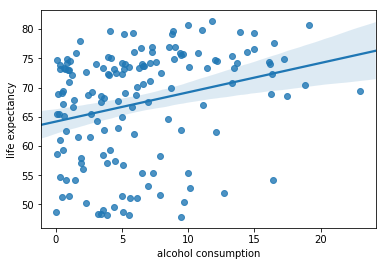

In [48]:
scat=seaborn.regplot(x='alcohol-cons',y='lifeexpectancy',data=sub1)
plt.xlabel('alcohol consumption')
plt.ylabel('life expectancy')

Text(0, 0.5, 'life expectancy')

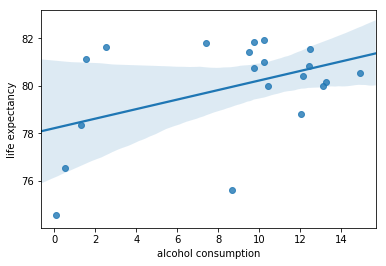

In [49]:
scat=seaborn.regplot(x='alcohol-cons',y='lifeexpectancy',data=sub2)
plt.xlabel('alcohol consumption')
plt.ylabel('life expectancy')

Text(0, 0.5, 'life expectancy')

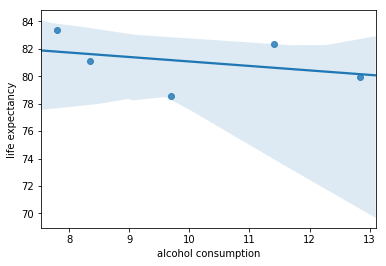

In [50]:
scat=seaborn.regplot(x='alcohol-cons',y='lifeexpectancy',data=sub3)
plt.xlabel('alcohol consumption')
plt.ylabel('life expectancy')

In [51]:
data_c.rename(columns={'alcohol-cons':'alcoholcons'}, inplace=True)
data_c.head()

,country,alcoholcons,lifeexpectancy,incomeperperson,binned,binned-LE,comp1v2,comp1v3,comp1v4,binned-income
0,Afghanistan,0.03,48.673,4264.980000,low,low,low,low,NaN,low
1,Albania,7.29,76.918,1914.996551,low,high,low,low,NaN,low
2,Algeria,0.69,73.131,2231.993335,low,high,low,low,NaN,low
3,Angola,5.57,51.093,1381.004268,low,low,low,low,NaN,low
4,Argentina,9.35,75.901,10749.419238,medium,high,medium,NaN,medium,low


Linear Regression

In [52]:
print('ols linear regression model for the association between alcohol consumption and life expectancy')
reg1=snf.ols('lifeexpectancy ~ alcoholcons',data=data_c).fit()
print(reg1.summary())

ols linear regression model for the association between alcohol consumption and life expectancy
                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     18.90
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           2.34e-05
Time:                        13:57:47   Log-Likelihood:                -642.36
No. Observations:                 176   AIC:                             1289.
Df Residuals:                     174   BIC:                             1295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [53]:
#for categorical explanatory variable
reg2=snf.ols('lifeexpectancy ~ binned',data=data_c).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     11.59
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           1.90e-05
Time:                        13:57:47   Log-Likelihood:                -640.38
No. Observations:                 176   AIC:                             1287.
Df Residuals:                     173   BIC:                             1296.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           66.5390      0.889  

In [54]:
#centring explanatory variable
data_c['cen']=data_c['alcoholcons']-np.mean(data_c['alcoholcons'])
data_c.head()

,country,alcoholcons,lifeexpectancy,incomeperperson,binned,binned-LE,comp1v2,comp1v3,comp1v4,binned-income,cen
0,Afghanistan,0.03,48.673,4264.980000,low,low,low,low,NaN,low,-6.61625
1,Albania,7.29,76.918,1914.996551,low,high,low,low,NaN,low,0.64375
2,Algeria,0.69,73.131,2231.993335,low,high,low,low,NaN,low,-5.95625
3,Angola,5.57,51.093,1381.004268,low,low,low,low,NaN,low,-1.07625
4,Argentina,9.35,75.901,10749.419238,medium,high,medium,NaN,medium,low,2.70375


Multiple Regression/ Polynomial Regression

In [55]:
#quadratic regression
reg3=snf.ols('lifeexpectancy ~ cen +I(cen**2)',data=data_c).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     9.663
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           0.000105
Time:                        13:57:47   Log-Likelihood:                -642.12
No. Observations:                 176   AIC:                             1290.
Df Residuals:                     173   BIC:                             1300.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      69.5651      0.930     74.777      

In [56]:
#multiple regression
reg4=snf.ols('lifeexpectancy ~ cen + incomeperperson',data=data_c).fit()
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     51.76
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           2.41e-18
Time:                        13:57:47   Log-Likelihood:                -610.17
No. Observations:                 176   AIC:                             1226.
Df Residuals:                     173   BIC:                             1236.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          65.4716      0.724     

Evaluating the model

In [57]:
import statsmodels.api as sm

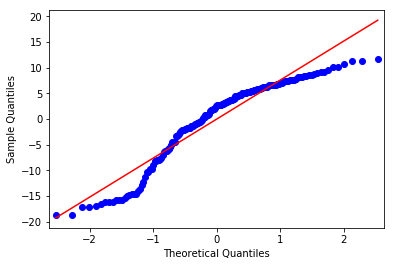

In [58]:
#qq plot for normality
fig1=sm.qqplot(reg4.resid,line='r')

Text(0.5, 0, 'Observation Number')

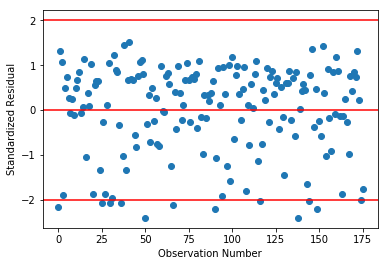

In [59]:
#simple plot of residuals
stdres=pd.DataFrame(reg4.resid_pearson)
plt.plot(stdres, 'o', ls='None')
l = plt.axhline(y=2, color='r')
l = plt.axhline(y=0, color='r')
l = plt.axhline(y=-2, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number')

Figure(576x432)


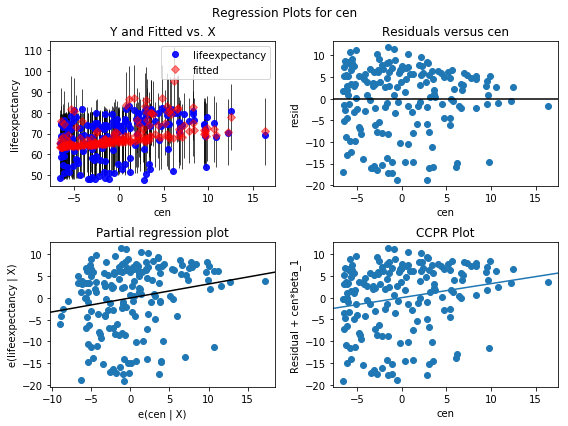

In [60]:
#additional regression diagnostic plots
fig2 = plt.figure(figsize=(8,6))
fig2 = sm.graphics.plot_regress_exog(reg4, "cen", fig=fig2)
print(fig2)

Figure(432x288)


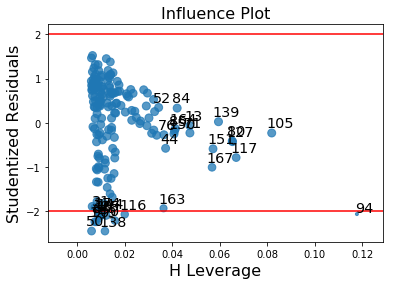

In [61]:
#leverage plot
fig3 = sm.graphics.influence_plot(reg4, size=3)
l = plt.axhline(y=2, color='r')
l = plt.axhline(y=-2, color='r')
print(fig3)


Reference group coding for categorical explanatory variables with more then 2 categories

In [62]:
data_c.rename(columns={'binned-income': 'binnedincome'},inplace=True)
data_c.head()

,country,alcoholcons,lifeexpectancy,incomeperperson,binned,binned-LE,comp1v2,comp1v3,comp1v4,binnedincome,cen
0,Afghanistan,0.03,48.673,4264.980000,low,low,low,low,NaN,low,-6.61625
1,Albania,7.29,76.918,1914.996551,low,high,low,low,NaN,low,0.64375
2,Algeria,0.69,73.131,2231.993335,low,high,low,low,NaN,low,-5.95625
3,Angola,5.57,51.093,1381.004268,low,low,low,low,NaN,low,-1.07625
4,Argentina,9.35,75.901,10749.419238,medium,high,medium,NaN,medium,low,2.70375


In [63]:
#default reference group taken as 'low' from binnedincome
reg5=snf.ols('lifeexpectancy ~ alcoholcons +C(binnedincome)',data=data_c).fit()
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     20.55
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           1.98e-11
Time:                        13:57:49   Log-Likelihood:                -624.48
No. Observations:                 176   AIC:                             1257.
Df Residuals:                     172   BIC:                             1270.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [64]:
#change the reference group
reg6=snf.ols('lifeexpectancy ~ alcoholcons +C(binnedincome, Treatment(reference= 1))',data=data_c).fit()
print(reg6.summary())

                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     20.55
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           1.98e-11
Time:                        13:57:49   Log-Likelihood:                -624.48
No. Observations:                 176   AIC:                             1257.
Df Residuals:                     172   BIC:                             1270.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Logistic Regression

In [65]:
def LE (row):
   if row['binned-LE'] == 'high': 
      return 1
   elif (row['binned-LE'] == 'low') | (row['binned-LE'] == 'medium') :
      return 0    
   else :
       return numpy.nan     
data_c['LEgroup'] = data_c.apply (lambda row: LE (row),axis=1)



In [66]:
data_c.head()

,country,alcoholcons,lifeexpectancy,incomeperperson,binned,binned-LE,comp1v2,comp1v3,comp1v4,binnedincome,cen,LEgroup
0,Afghanistan,0.03,48.673,4264.980000,low,low,low,low,NaN,low,-6.61625,0
1,Albania,7.29,76.918,1914.996551,low,high,low,low,NaN,low,0.64375,1
2,Algeria,0.69,73.131,2231.993335,low,high,low,low,NaN,low,-5.95625,1
3,Angola,5.57,51.093,1381.004268,low,low,low,low,NaN,low,-1.07625,0
4,Argentina,9.35,75.901,10749.419238,medium,high,medium,NaN,medium,low,2.70375,1


In [67]:
#logistic regression with alcohol consumption
lreg1 = snf.logit(formula = 'LEgroup ~ alcoholcons', data = data_c).fit()
print (lreg1.summary()) 
# odds ratios
print ("Odds Ratios")
print (np.exp(lreg1.params))

Optimization terminated successfully.
         Current function value: 0.653987
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                LEgroup   No. Observations:                  176
Model:                          Logit   Df Residuals:                      174
Method:                           MLE   Df Model:                            1
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                 0.05217
Time:                        13:57:49   Log-Likelihood:                -115.10
converged:                       True   LL-Null:                       -121.44
                                        LLR p-value:                 0.0003716
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.5846      0.264     -2.214      0.027      -1.102      -0.067
alcoholcons     0.1151    

In [68]:
lreg2 = snf.logit(formula = 'LEgroup ~ alcoholcons + incomeperperson', data = data_c).fit()
print (lreg2.summary())

Optimization terminated successfully.
         Current function value: 0.383521
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                LEgroup   No. Observations:                  176
Model:                          Logit   Df Residuals:                      173
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 Aug 2020   Pseudo R-squ.:                  0.4442
Time:                        13:57:49   Log-Likelihood:                -67.500
converged:                       True   LL-Null:                       -121.44
                                        LLR p-value:                 3.763e-24
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.9833      0.393     -5.040      0.000      -2.755      -1.212
alcoholcons   

In [69]:
# odd ratios with 95% confidence intervals
params = lreg2.params
conf = lreg2.conf_int()
conf['OR'] = params
conf.columns = ['Lower CI', 'Upper CI', 'OR']
print (np.exp(conf))

                 Lower CI  Upper CI        OR
Intercept        0.063640  0.297588  0.137617
alcoholcons      0.912575  1.096281  1.000219
incomeperperson  1.000460  1.001011  1.000736


DECISION TREE

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

In [71]:
predictors= data_c[['alcoholcons','incomeperperson']]
target= data_c['LEgroup']

In [72]:
pred_train, pred_test, tar_train, tar_test= train_test_split(predictors, target, test_size= .4)

In [73]:
pred_train.shape

(105, 2)

In [74]:
pred_test.shape

(71, 2)

In [75]:
tar_train.shape

(105,)

In [76]:
classifier= DecisionTreeClassifier()
classifier=classifier.fit(pred_train, tar_train)

In [77]:
predictions= classifier.predict(pred_test)

In [78]:
sklearn.metrics.confusion_matrix(tar_test,predictions)

array([[25,  5],
       [ 5, 36]])

In [79]:
print(predictions[0:5])

[0 0 0 0 1]


In [80]:
print(tar_test[0:5])

142    0
30     0
105    0
144    0
103    1
Name: LEgroup, dtype: int64


In [81]:
sklearn.metrics.accuracy_score(tar_test,predictions)

0.8591549295774648

Random Forests

In [82]:
from sklearn.ensemble import ExtraTreesClassifier

In [83]:
from sklearn.ensemble import RandomForestClassifier

In [84]:
classifier=RandomForestClassifier(n_estimators= 25)

In [85]:
classifier=classifier.fit(pred_train, tar_train)

In [86]:
predictions= classifier.predict(pred_test)

In [87]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.8591549295774648

In [88]:
sklearn.metrics.confusion_matrix(tar_test, predictions)

array([[27,  3],
       [ 7, 34]])

In [89]:
model=ExtraTreesClassifier()

In [90]:
model.fit(pred_train,tar_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [91]:
print(model.feature_importances_)

[0.29246791 0.70753209]


In [92]:
trees=range(25)
accuracy=np.zeros(25)

In [93]:
for idx in range(len(trees)):
    classifier=RandomForestClassifier(n_estimators=idx+1)
    classifier=classifier.fit(pred_train,tar_train)
    predictions=classifier.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions)

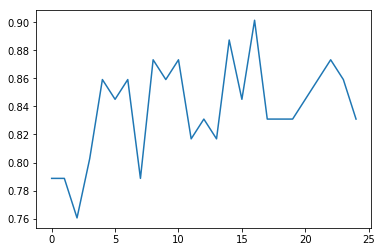

In [94]:
plt.cla()
plt.plot(trees, accuracy)

LASSO REGRESSION

In [95]:
from sklearn.linear_model import LassoLarsCV

In [96]:
preds=predictors.copy()

In [97]:
from sklearn import preprocessing

In [98]:
#standardize all predictive variables
preds['alcoholcons']=preprocessing.scale(preds['alcoholcons']).astype(float)

In [100]:
preds['incomeperperson']=preprocessing.scale(preds['incomeperperson']).astype(float)

In [ ]:
pred_train,pred_test,tar_train,tar_test=train_test_split(preds,target,test_size=.3,random_state=123)

In [ ]:
model=LassoLarsCV(cv=10,precompute=False).fit(pred_train,tar_train)

In [ ]:
dict(zip(preds.columns,model.coef_))

In [106]:
#plot coefficient progression
m_log_alphas=-np.log10(model.alphas_)
ax=plt.gca()
plt.plot(m_log_alphas,model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_),linestyle='--',color='k',label='alpha CV')
plt.ylabel('regression coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression coefficients progression for Lasso Paths')


AttributeError: 'ExtraTreesClassifier' object has no attribute 'alphas_'

In [105]:
#plot mean square error for each fold
m_log_alphascv=-np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv,model.cv_mse_path_ ,':')
plt.plot(m_log_alphascv,model.cv_mse_path_.mead(axis=-1),'k',label='average across the folds',linewidth=2)
plt.axvline(-np.log10(model.alpha_),linestyle='--',color='k',label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('mean squared error')
plt.title('mean square error on each fold')

AttributeError: 'ExtraTreesClassifier' object has no attribute 'cv_alphas_'

In [103]:
#mse for training and test data
from sklearn.metrics import mean_squared_error
train_error=mean_squared_error(tar_train,model.predict(pred_train))
test_error=mean_squared_error(tar_test,model.predict(pred_test))
print('training data mse')
print(train_error)
print('test data mse')
print(test_error)

training data mse
0.0
test data mse
0.22535211267605634


In [104]:
#R-square for train and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print('training data R-square')
print(rsquared_train)
print('test data R-square')
print(rsquared_test)

training data R-square
1.0
test data R-square
0.7746478873239436


KMeans Clustering

In [109]:
from sklearn.cluster import KMeans

In [110]:
data_c.head()

,country,alcoholcons,lifeexpectancy,incomeperperson,binned,binned-LE,comp1v2,comp1v3,comp1v4,binnedincome,cen,LEgroup
0,Afghanistan,0.03,48.673,4264.980000,low,low,low,low,NaN,low,-6.61625,0
1,Albania,7.29,76.918,1914.996551,low,high,low,low,NaN,low,0.64375,1
2,Algeria,0.69,73.131,2231.993335,low,high,low,low,NaN,low,-5.95625,1
3,Angola,5.57,51.093,1381.004268,low,low,low,low,NaN,low,-1.07625,0
4,Argentina,9.35,75.901,10749.419238,medium,high,medium,NaN,medium,low,2.70375,1


In [111]:
from scipy.spatial.distance import cdist

In [112]:
clusters=range(1,10)
meandist=[]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(pred_train)
    clusassign=model.predict(pred_train)
    meandist.append(sum(np.min(cdist(pred_train,model.cluster_centers_,'euclidean'),axis=1))/ pred_train.shape[0])

Text(0.5, 1.0, 'selecting K with the elbow method')

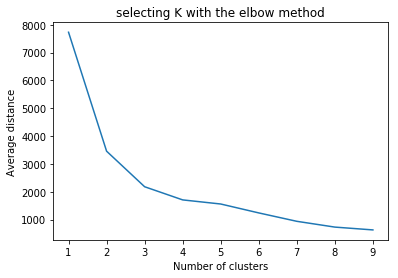

In [113]:
plt.plot(clusters,meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('selecting K with the elbow method')

In [114]:
#3 cluster solution
model3=KMeans(n_clusters=3)
model3.fit(pred_train)
clusassign=model3.predict(pred_train)

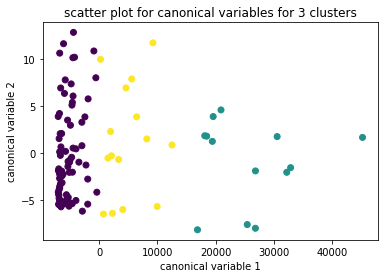

In [115]:
#plot clusters
#Canonical discrimate analysis-- to reduce the number of clustering variables if there are many variables
from sklearn.decomposition import PCA
pca_2=PCA(2)
plot_columns=pca_2.fit_transform(pred_train)
plt.scatter(x=plot_columns[:,0],y=plot_columns[:,1],c=model3.labels_,)
plt.xlabel('canonical variable 1')
plt.ylabel('canonical variable 2')
plt.title('scatter plot for canonical variables for 3 clusters')
plt.show()


In [125]:
#create a list that has new index variable
cluslist=list(pred_train['index'])
#create a list of cluster assignments
label=list(model3.labels_)
#combine index variable list with cluster assignment list in a dictionary
newlist=dict(zip(cluslist,label))
newlist
#convert newlist to a dataframe
newclus=pd.DataFrame.from_dict(newlist,orient='index')
newclus
newclus.columns=['cluster']
newclus.reset_index(level=0,inplace=True)
merged_train=pd.merge(pred_train,newclus,on='index')
merged_train.head(20)

,level_0,index,alcoholcons,incomeperperson,cluster
0,0,28,10.20,25575.352623,1
1,1,148,6.56,2668.020519,0
2,2,168,8.99,9106.327234,2
3,3,126,13.89,11744.834167,2
4,4,106,3.41,772.933345,0
5,5,7,12.40,26692.984107,1
6,6,110,12.09,2667.246710,0
7,7,66,3.90,161.317137,0
8,8,61,3.11,358.979540,0
9,9,23,11.40,2549.558474,0


In [126]:
clustergrp=merged_train.groupby('cluster').mean()
print('clustering variable mean by cluster')
print(clustergrp)

clustering variable mean by cluster
           level_0      index  alcoholcons  incomeperperson
cluster                                                    
0        52.922078  90.506494     5.865455      1858.599254
1        50.461538  91.000000     8.192308     32751.034839
2        48.600000  84.200000     8.257333     11988.714275


In [128]:
#clusters for life expectancy
data=data_c['lifeexpectancy']
LEtrain,LEtest=train_test_split(data,test_size=.3,random_state=123)
LEtrain1=pd.DataFrame(LEtrain)
LEtrain1.reset_index(level=0,inplace=True)
merged_train_all=pd.merge(LEtrain1,merged_train,on='index')

In [129]:
gpamod=snf.ols(formula='lifeexpectancy ~ C(cluster)',data=merged_train_all).fit()
print(gpamod.summary())
print('means for LE by cluster')
m1=merged_train_all.groupby('cluster').mean()
print(m1)
print('standard deviation for LE by cluster')
sd1=merged_train_all.groupby('cluster').std()
print(sd1)
mc1=multi.MultiComparison(merged_train_all['lifeexpectancy'],merged_train_all['cluster'])
res1=mc1.tukeyhsd()
print(res1.summary())


                            OLS Regression Results                            
Dep. Variable:         lifeexpectancy   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     21.08
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           6.22e-08
Time:                        14:58:28   Log-Likelihood:                -263.14
No. Observations:                  75   AIC:                             532.3
Df Residuals:                      72   BIC:                             539.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          64.0975      1.144     